In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("D:/Data Science/Symbiosis/Time Series/Sales Time Series Data/retail_sales.csv",parse_dates=["date"])
df.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    72 non-null     datetime64[ns]
 1   sales   72 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


<AxesSubplot:xlabel='date'>

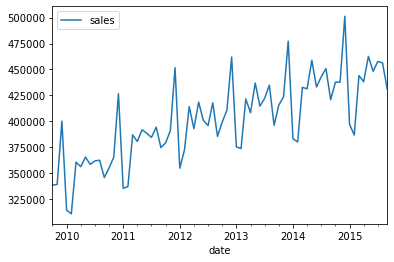

In [5]:
df.plot(x="date",y="sales")

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

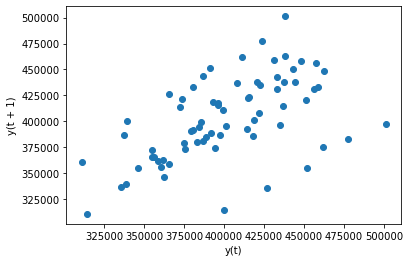

In [6]:
pd.plotting.lag_plot(df.sales)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

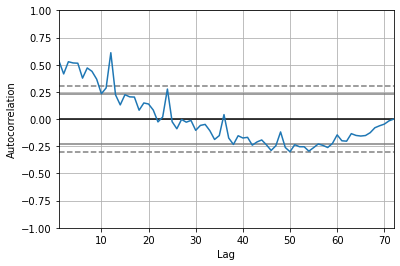

In [7]:
#auto correlation plot

pd.plotting.autocorrelation_plot(df.sales)

In [8]:
#p-> lag order->AR (auto regression)

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

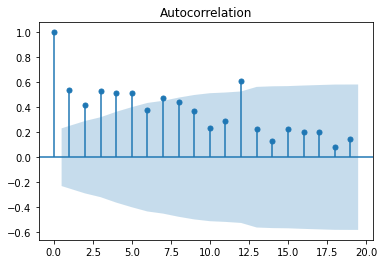

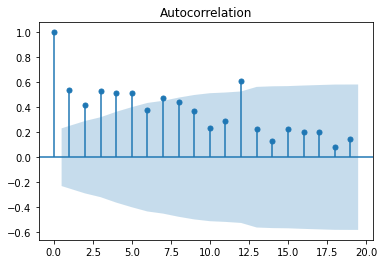

In [10]:
plot_acf(df.sales)

In [11]:
df["Sales_diff"]=df.sales.diff()


<AxesSubplot:xlabel='date'>

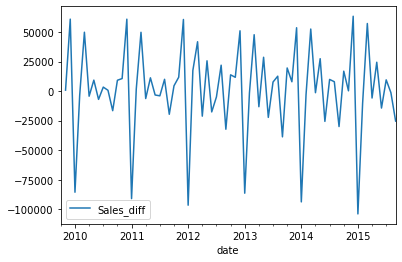

In [12]:
df.plot(x="date",y="Sales_diff")

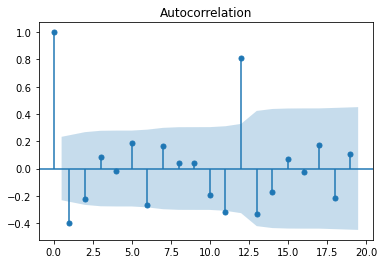

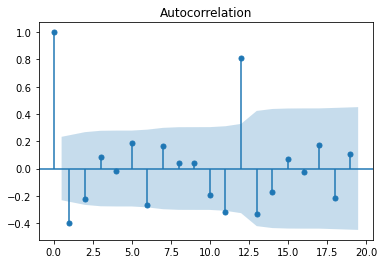

In [13]:
plot_acf(df.Sales_diff.dropna())

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
df=df.set_index("date")

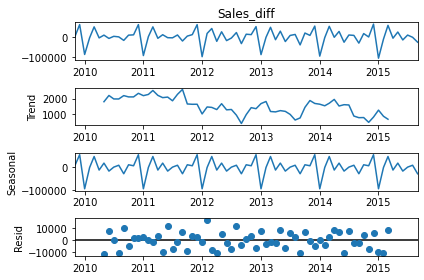

In [16]:
decomposition=seasonal_decompose(df.Sales_diff.dropna())
fig=decomposition.plot()

In [17]:
from statsmodels.tsa.ar_model import AR
model=AR(df.Sales_diff.dropna())
m=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

In [18]:
m.k_ar #lag value used by the model

11

In [19]:
m.params

const             15027.727453
L1.Sales_diff        -0.943287
L2.Sales_diff        -0.864018
L3.Sales_diff        -0.776996
L4.Sales_diff        -0.728419
L5.Sales_diff        -0.650647
L6.Sales_diff        -0.661094
L7.Sales_diff        -0.685425
L8.Sales_diff        -0.759637
L9.Sales_diff        -0.868345
L10.Sales_diff       -0.973031
L11.Sales_diff       -0.999687
dtype: float64

In [20]:
predictions=m.predict(dynamic=False)

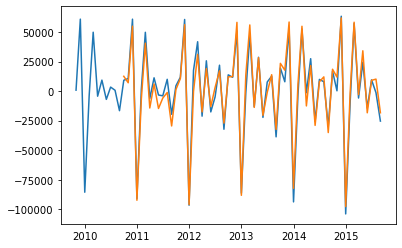

In [21]:
plt.plot(df.Sales_diff)
plt.plot(predictions)

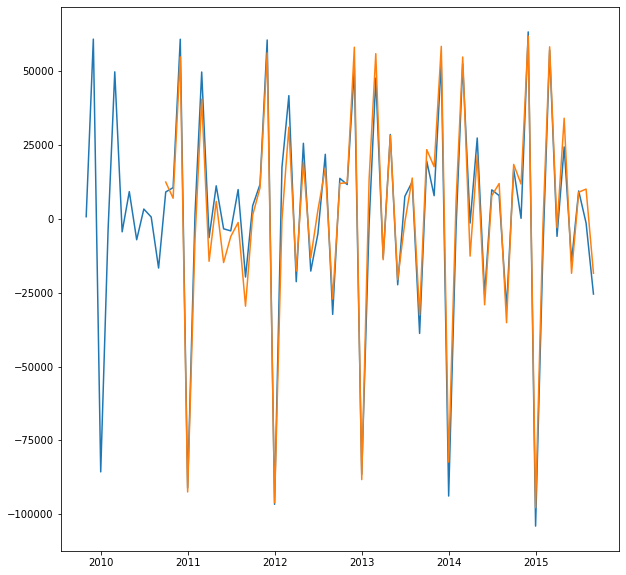

In [22]:
fig=plt.figure(figsize=(10,10))
plt.plot(df.Sales_diff,label="actual")
plt.plot(predictions,label="predictions")

# ARIMA 

In [23]:
#Auto regression integrate moving average
#p -lag order                 d -differncing term        q- moving  average term

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv("D:/Data Science/Symbiosis/Time Series/Sales Time Series Data/shampoo.csv")
df.head()

,Month,Sales
0,01-01,266.0
1,01-02,145.9
2,01-03,183.1
3,01-04,119.3
4,01-05,180.3


<AxesSubplot:>

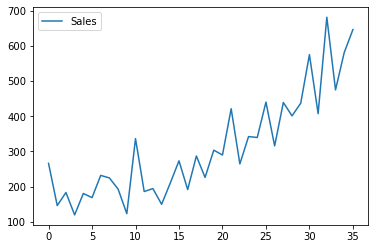

In [27]:
df.plot()

In [28]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df.Sales)
pval=res[1]
if pval<0.05:
    print(" it is stationary")
else:
    print("It is not stationary")

It is not stationary


In [29]:
df_diff1=df.Sales.diff()
df_diff2=df.Sales.diff().diff()

<AxesSubplot:>

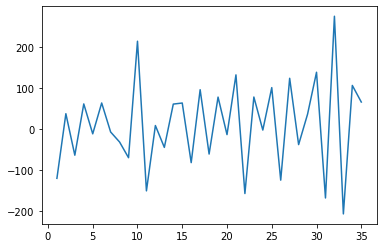

In [30]:
df_diff1.plot()

In [31]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df_diff2.dropna())
pval=res[1]
if pval<0.05:
    print(" it is stationary")
else:
    print("It is not stationary")

 it is stationary


In [32]:
#d=1

In [33]:
#log order

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

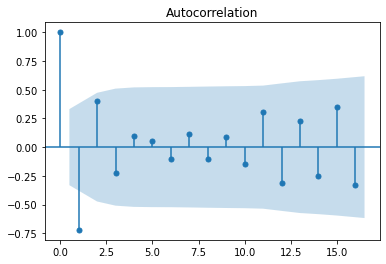

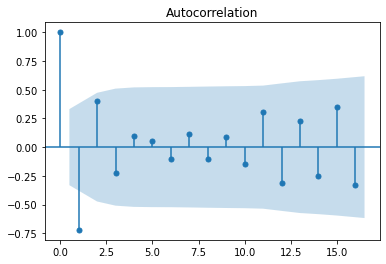

In [35]:
plot_acf(df_diff1.dropna())

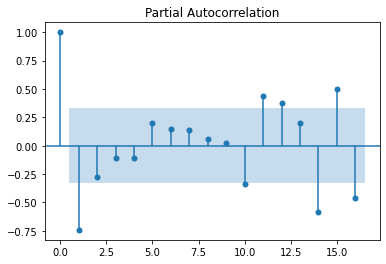

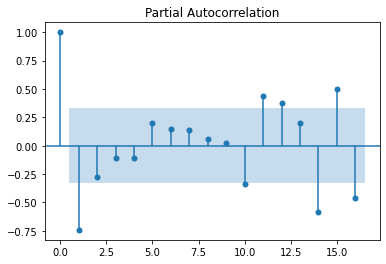

In [36]:
plot_pacf(df_diff1.dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


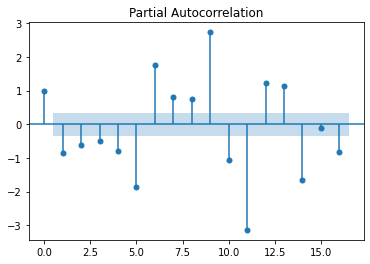

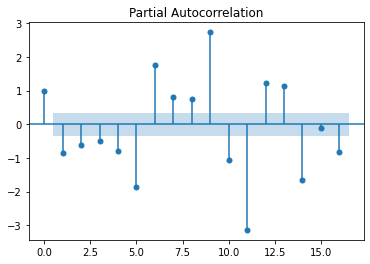

In [37]:
plot_pacf(df_diff2.dropna())

In [38]:
# diff d=1 lag order p-->1

In [39]:
# diff d=2 lag order p-->6,7 q=1

In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [41]:
model=ARIMA(df.Sales,order=(1,1,2))
m=model.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

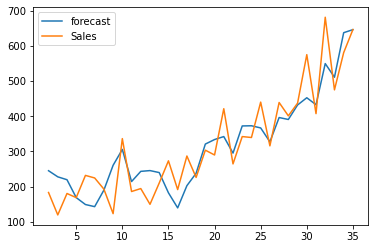

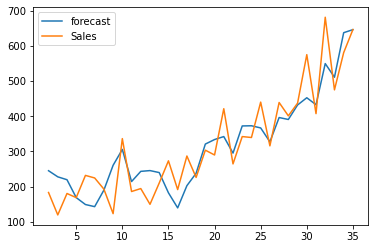

In [42]:
m.plot_predict(dynamic=False)

In [43]:
m.resid

1    -130.382213
2     -61.989372
3    -108.433053
4     -39.185011
5      -0.091653
6      82.917096
7      81.681400
8       2.986666
9    -137.659031
10     30.746912
11    -28.324425
12    -48.975283
13    -95.983317
14    -29.731316
15     91.058205
16     52.076079
17     84.501178
18    -11.895300
19    -17.363116
20    -43.957194
21     79.291524
22    -30.768743
23    -30.263906
24    -33.379237
25     73.493533
26    -11.476256
27     42.827521
28     10.330074
29      5.149081
30    122.670655
31    -25.360842
32    131.926363
33    -35.920119
34    -56.747712
35      0.227398
dtype: float64

<AxesSubplot:>

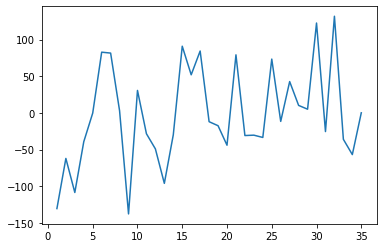

In [44]:
m.resid.plot()

<AxesSubplot:ylabel='Frequency'>

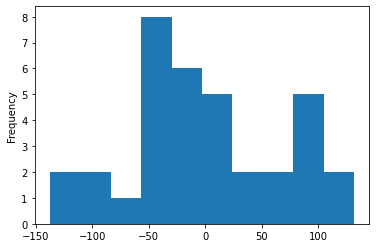

In [45]:
m.resid.plot(kind="hist")

<AxesSubplot:ylabel='Density'>

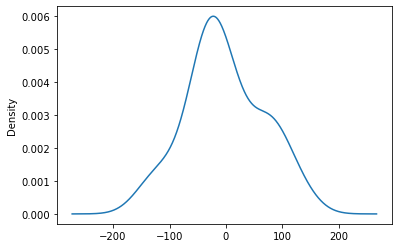

In [46]:
m.resid.plot(kind="kde")